# Сравнение выручки

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st

In [213]:
font = {'family': 'sans-serif',
        'color':  '#a72693',
        'weight': 'normal',
        'size': 20,
        }

In [214]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [215]:
#открывем файлы с данными, смотрит структуру таблиц
users = pd.read_csv('users.csv')
calls = pd.read_csv('calls.csv')
messages = pd.read_csv('messages.csv')
internet = pd.read_csv('internet.csv')
tariffs = pd.read_csv('tariffs.csv')


In [216]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [217]:
#статистика таблицы
users.describe()

,user_id,age
count,500.00,500.00
mean,"1,249.50",46.59
std,144.48,16.67
min,"1,000.00",18.00
25%,"1,124.75",32.00
50%,"1,249.50",46.00
75%,"1,374.25",62.00
max,"1,499.00",75.00


In [218]:
# приводим даты к нужному формату
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [219]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [220]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [221]:
calls.describe()

,duration,user_id
count,"202,607.00","202,607.00"
mean,6.76,"1,253.94"
std,5.84,144.72
min,0.00,"1,000.00"
25%,1.30,"1,126.00"
50%,6.00,"1,260.00"
75%,10.70,"1,379.00"
max,38.00,"1,499.00"


In [222]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [223]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")

In [224]:
#определяем целочисленный формат
calls['id'] = calls['id'].astype('int')

In [225]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [226]:
calls.head()

,id,call_date,duration,user_id
0,10000,2018-07-25,0,1000
1,10001,2018-08-17,0,1000
2,10002,2018-06-11,3,1000
3,10003,2018-09-21,14,1000
4,10004,2018-12-15,6,1000


In [227]:
calls['duration'] = calls['duration'].replace(0, 1)

In [228]:
calls.describe()

,id,duration,user_id
count,"202,607.00","202,607.00","202,607.00"
mean,"1,212,254.17",7.35,"1,253.94"
std,"1,725,756.38",5.73,144.72
min,"10,000.00",1.00,"1,000.00"
25%,"1,012,286.50",2.00,"1,126.00"
50%,"1,179,376.00",6.00,"1,260.00"
75%,"1,358,125.50",11.00,"1,379.00"
max,"14,581,154.00",38.00,"1,499.00"


In [229]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  int32         
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(1)
memory usage: 4.6 MB


In [230]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [231]:
messages['id'] = messages['id'].astype('int')

In [232]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

In [233]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  int32         
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1)
memory usage: 2.3 MB


In [234]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,"1,052.81",2018-09-07,1000
2,1000_2,"1,197.26",2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [235]:
internet.describe()

,mb_used,user_id
count,"149,396.00","149,396.00"
mean,370.19,"1,252.10"
std,278.30,144.05
min,0.00,"1,000.00"
25%,138.19,"1,130.00"
50%,348.01,"1,251.00"
75%,559.55,"1,380.00"
max,"1,724.83","1,499.00"


In [236]:
internet['id'] = internet['id'].astype('int')

In [237]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

In [238]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  int32         
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 4.0 MB


In [239]:
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [240]:
#переименовываем столбец
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [241]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mg_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff                 2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [242]:
# выводим по дате название месяца
calls['month'] = calls['call_date'].dt.month_name()

In [243]:
calls.head()

,id,call_date,duration,user_id,month
0,10000,2018-07-25,1,1000,July
1,10001,2018-08-17,1,1000,August
2,10002,2018-06-11,3,1000,June
3,10003,2018-09-21,14,1000,September
4,10004,2018-12-15,6,1000,December


In [244]:
# группируем данные в таблице по номеру пользователя и месяцу, суммируя минуты и находя количество звонков
user_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'month_calls_duration','id':'calls_total_in_month'})\



In [245]:
#Количество сделанных звонков и израсходованных минут разговора по месяцам;
user_calls.head()

,user_id,month,month_calls_duration,calls_total_in_month
0,1000,August,418,52
1,1000,December,341,46
2,1000,July,346,47
3,1000,June,187,43
4,1000,May,164,22


In [246]:
# вводим названия месяцев
messages['month'] = messages['message_date'].dt.month_name()

In [247]:
messages.head()

,id,message_date,user_id,month
0,10000,2018-06-27,1000,June
1,10001,2018-10-08,1000,October
2,10002,2018-08-04,1000,August
3,10003,2018-06-16,1000,June
4,10004,2018-12-05,1000,December


In [248]:
# группируем, находим количество сообщений по месяцам для каждого пользователя
user_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'sms_total_in_month'})

In [249]:
#Kоличество отправленных сообщений по месяцам
user_messages.head()

,user_id,month,sms_total_in_month
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22


In [250]:
internet['month'] = internet['session_date'].dt.month_name()

In [251]:
internet.head()

,id,mb_used,session_date,user_id,month
0,10000,112.95,2018-11-25,1000,November
1,10001,"1,052.81",2018-09-07,1000,September
2,10002,"1,197.26",2018-06-25,1000,June
3,10003,550.27,2018-08-22,1000,August
4,10004,302.56,2018-09-24,1000,September


In [252]:
# группируем, находим суммарный трафик по месяцам для каждого пользователя
user_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'mb_total_in_month'})

In [253]:
#Объем израсходованного интернет-трафика по месяцам;
user_internet.head()

,user_id,month,mb_total_in_month
0,1000,August,"14,055.93"
1,1000,December,"9,817.61"
2,1000,July,"14,003.64"
3,1000,June,"23,233.77"
4,1000,May,"2,253.49"


In [254]:
user_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            3203 non-null   int64  
 1   month              3203 non-null   object 
 2   mb_total_in_month  3203 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 75.2+ KB


In [255]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [256]:
# Склеим добро в одно целое добро
df = user_calls.merge(user_messages, on=['user_id','month'], how='outer')

In [257]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month
0,1000,August,418.00,52.00,81.00
1,1000,December,341.00,46.00,70.00
2,1000,July,346.00,47.00,75.00
3,1000,June,187.00,43.00,60.00
4,1000,May,164.00,22.00,22.00


In [258]:
#добавляем интернет  за счет склеивания
df = df.merge(user_internet, on=['user_id','month'], how = 'outer')
df.tail()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month
3209,1489,December,NaN,NaN,35.00,"17,322.51"
3210,1489,November,NaN,NaN,20.00,"17,491.56"
3211,1489,October,NaN,NaN,21.00,"19,559.44"
3212,1489,September,NaN,NaN,32.00,"17,206.30"
3213,1476,April,NaN,NaN,NaN,530.78


In [259]:
#добавляем тариф в таблицу за счет склеивания
df = df.merge(users, on='user_id', how='left')
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,August,418.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,December,341.00,46.00,70.00,"9,817.61",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,July,346.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,June,187.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,May,164.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [260]:
#добавляем информацию о тарифе за счет склеивания
df = df.merge(tariffs, on='tariff', how='left')
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,418.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,December,341.00,46.00,70.00,"9,817.61",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,July,346.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,June,187.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,May,164.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [261]:
df.isna().sum()

user_id                     0
month                       0
month_calls_duration       40
calls_total_in_month       40
sms_total_in_month        497
mb_total_in_month          11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mg_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [262]:
# Поставим нули людям-героям: тем, которые не тратят интернет и не пишут смс
df['sms_total_in_month'] = df['sms_total_in_month'].fillna(0)
df['mb_total_in_month'] = df['mb_total_in_month'].fillna(0)
df['month_calls_duration'] = df['month_calls_duration'].fillna(0)
df['calls_total_in_month'] = df['calls_total_in_month'].fillna(0)

In [263]:
df.isna().sum()

user_id                     0
month                       0
month_calls_duration        0
calls_total_in_month        0
sms_total_in_month          0
mb_total_in_month           0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mg_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [264]:
df.duplicated().sum()

0

In [265]:
# функция для нахождения оплаты для каждой строки с учетом тарифа
def above_the_tariff(row):
    sms = (row['sms_total_in_month'] - row['messages_included']) * row['rub_per_message']
    mins = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.floor((row['mb_total_in_month'] - row['mg_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [266]:
df['above_the_tariff'] = df.apply(lambda x: above_the_tariff(x), axis=1)

In [267]:
df['total_paid'] = df['rub_monthly_fee'] + df['above_the_tariff']

In [268]:
df.sort_values(by='total_paid').tail()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
1792,1286,December,751.00,95.00,68.00,"35,108.07",19,NaT,Москва,Рашид,Троицкий,2018-11-27,smart,50,15360,500,550,200,3,3,"4,664.00","5,214.00"
3105,1486,November,788.00,108.00,96.00,"36,266.11",35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,"5,085.00","5,635.00"
259,1042,December,755.00,121.00,75.00,"37,165.69",42,NaT,Хабаровск,Константин,Добрынин,2018-11-25,smart,50,15360,500,550,200,3,3,"5,098.00","5,648.00"
1620,1261,December,"1,102.00",141.00,22.00,"32,650.91",46,NaT,Казань,Мадина,Пантелеева,2018-10-30,smart,50,15360,500,550,200,3,3,"5,183.00","5,733.00"
3104,1486,December,"1,025.00",133.00,83.00,"38,552.45",35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,"6,203.00","6,753.00"


In [269]:
# Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа
# в месяц? 

In [270]:
df[['above_the_tariff', 'total_paid']].describe()

,above_the_tariff,total_paid
count,"3,214.00","3,214.00"
mean,517.13,"1,496.19"
std,741.66,785.58
min,0.00,550.00
25%,0.00,711.25
50%,122.50,"1,584.00"
75%,853.75,"1,950.00"
max,"6,203.00","6,753.00"


In [271]:
df['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

<AxesSubplot:ylabel='Frequency'>

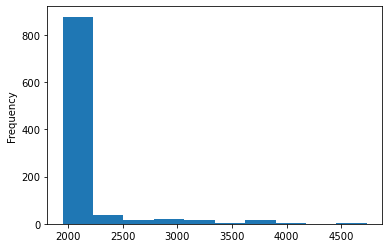

In [272]:
#Тариф ultra, Гистограмма показывает данные (кол-во пользователей) в десяти интервалах от мин-й оплаты, до мак-й  оплаты
df[df['tariff'] == 'ultra']['total_paid'].plot(kind='hist', bins=10)

<AxesSubplot:ylabel='Frequency'>

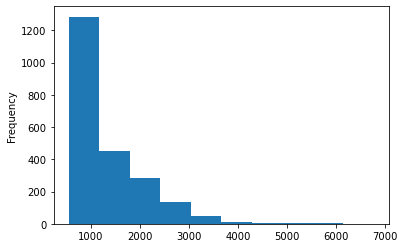

In [273]:
#Тариф smart
df[df['tariff'] == 'smart']['total_paid'].plot(kind='hist', bins=10)

In [274]:
# данные для гистограмм: кол-во звонков в месяц для каждого тарифа
df.groupby('tariff')\
  .agg({'total_paid':['median','mean','var','std']})\
  .style.format("{:.2f}")

Text(0.5, 1.0, 'Смарт — Звонки в минутах в месяц')

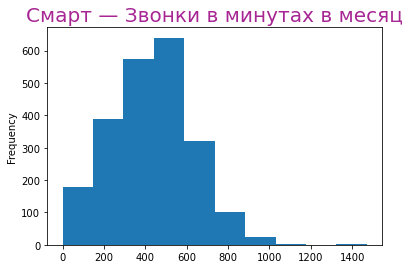

In [275]:
df[df['tariff'] == 'smart']['month_calls_duration'].plot(kind='hist', bins=10)
plt.title('Смарт — Звонки в минутах в месяц', fontdict=font)

Text(0.5, 1.0, 'Ультра — Звонки в минутах в месяц')

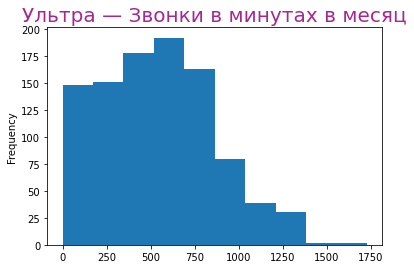

In [276]:
df[df['tariff'] == 'ultra']['month_calls_duration'].plot(kind='hist', bins=10)
plt.title('Ультра — Звонки в минутах в месяц', fontdict=font)

Text(0.5, 1.0, 'Смарт — Интернет в МБ в месяц')

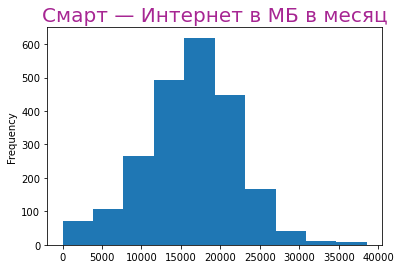

In [277]:
# данные для гистограмм: Mb интернета  в месяц для каждого тарифа
df[df['tariff'] == 'smart']['mb_total_in_month'].plot(kind='hist', bins=10)
plt.title('Смарт — Интернет в МБ в месяц', fontdict=font)

Text(0.5, 1.0, 'Ультра — Интернет в МБ в месяц')

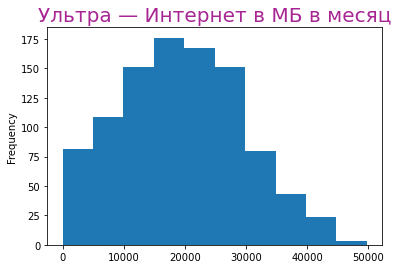

In [278]:
df[df['tariff'] == 'ultra']['mb_total_in_month'].plot(kind='hist', bins=10)
plt.title('Ультра — Интернет в МБ в месяц', fontdict=font)

Text(0.5, 1.0, 'Смарт — СМС в месяц')

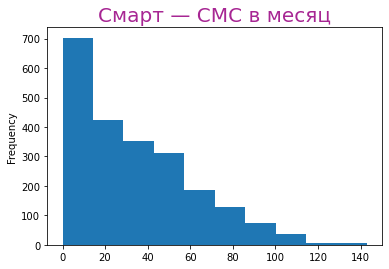

In [279]:
# данные для гистограмм: кол-во СМС  в месяц для каждого тарифа
df[df['tariff'] == 'smart']['sms_total_in_month'].plot(kind='hist', bins=10)
plt.title('Смарт — СМС в месяц', fontdict=font)

Text(0.5, 1.0, 'Ультра — СМС в месяц')

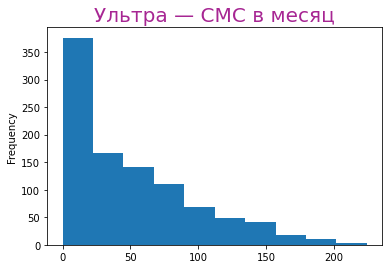

In [280]:
df[df['tariff'] == 'ultra']['sms_total_in_month'].plot(kind='hist', bins=10)
plt.title('Ультра — СМС в месяц', fontdict=font)

In [281]:
#Проверка гипотез: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
#Будем использовать t-критерий Стьюдента

In [282]:
# Напишем функцию для удаления выбросов
def delete_outliers(df, column, graphic=0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[iqr_test]

In [283]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
0,1000,August,418.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
1,1000,December,341.00,46.00,70.00,"9,817.61",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
2,1000,July,346.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
3,1000,June,187.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
4,1000,May,164.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"


In [284]:
#Выделяем из общей таблицы выручку пользователей для каждого тарифа 
ultra = df[df['tariff'] == 'ultra']
smart = df[df['tariff'] == 'smart']

In [285]:
# удаляем строки с нулевой оплатой, исключаем их из выборки
ultra = delete_outliers(ultra, 'total_paid', 0)
ultra = ultra['total_paid']

In [286]:
smart = delete_outliers(smart, 'total_paid', 0)
smart = smart['total_paid']

In [287]:
# критический уровень статистической значимости
alpha = 0.05

In [288]:
# используем из библиотеки статистики  функцию ttest_ind () для вычисления  t-критерия Стьюдента
results = st.ttest_ind(ultra, smart)
# equal_var = False

In [289]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3166937589634654e-188
Отвергаем нулевую гипотезу


In [290]:
# проверка гипотезы:средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
# Гипотеза о равенстве средних двух генеральных совокупностей

In [291]:
# Функция unique() находит уникальные элементы массива и возвращает их в отсортированном массиве, названия городов берем из таблицы
df['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [292]:
# в таблице все города, кроме Москвы, меняет на Провинцию
df['region'] = np.where(df['city'] == 'Москва', 'Москва', 'Провинция')

In [293]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid,region
0,1000,August,418.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00",Провинция
1,1000,December,341.00,46.00,70.00,"9,817.61",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00",Провинция
2,1000,July,346.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00",Провинция
3,1000,June,187.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00",Провинция
4,1000,May,164.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00",Провинция


In [294]:
# выделяем две таблицы из исходной
moscow = df[df['region'] == 'Москва']
province = df[df['region'] == 'Провинция']

In [295]:
# удаляем строки с нулевой оплатой, вызывая функцию delete_outliers
moscow = delete_outliers(moscow, 'total_paid', 0)
moscow = moscow['total_paid']

In [296]:
province = delete_outliers(province, 'total_paid', 0)
province = province['total_paid']

In [297]:
# используем из библиотеки статистики  функцию ttest_ind () для вычисления  t-критерия Стьюдента
results = st.ttest_ind(moscow, province)
# equal_var = False

In [298]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3093521905092109
Не получилось отвергнуть нулевую гипотезу
